In [1]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import LSTM,Dense,Dropout,Softmax
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
import multiprocessing
import xgboost as xgb
from joblib import parallel_backend
from datetime import timedelta,datetime
import scipy

In [2]:
start=datetime.now()
print(start)
cores=multiprocessing.cpu_count()
tf.config.threading.set_inter_op_parallelism_threads(cores)
tf.config.threading.set_intra_op_parallelism_threads(cores)
cores

2023-11-23 19:14:03.693507


8

In [3]:
df=pd.read_csv('./Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv.')
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,170366.000000,1.703660e+05,170366.000000,170366.000000,1.703660e+05,1.703660e+05,170366.000000,170366.000000,170366.000000,170366.000000,...,170366.000000,170366.000000,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05
mean,7897.090599,1.246354e+07,15.124620,18.022276,5.569859e+02,3.183147e+04,167.775982,22.697786,48.233250,47.235628,...,11.925108,25.584506,7.433804e+04,4.676038e+04,1.646422e+05,5.012699e+04,3.690478e+06,1.310724e+05,3.784764e+06,3.543232e+06
std,18235.489428,3.193852e+07,1123.107756,1494.492871,7.710431e+03,3.460816e+06,461.299214,37.990783,94.947821,141.927429,...,1077.898793,6.354041,6.182048e+05,3.689605e+05,9.958673e+05,5.606797e+05,1.298830e+07,1.733767e+06,1.325135e+07,1.284183e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,7.882314,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.141200e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.169818e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,192491.000000,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


In [5]:
(df==np.nan).sum().sum()

0

In [6]:
df.replace(np.inf,np.NaN,inplace=True)
df=df.dropna()

In [7]:
df.dtypes=='object'

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                          True
Length: 79, dtype: bool

In [8]:
df[' Label'].value_counts()[:].index

Index(['BENIGN', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection'],
      dtype='object')

In [9]:
df[' Label'].value_counts()

BENIGN                        168051
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name:  Label, dtype: int64

In [10]:
# lab=df[' Label'].value_counts()[11:].index
# counts=df[' Label'].value_counts()
# lab,counts[11:]

In [11]:
# for j in range(lab.size):
#     df.loc[df[' Label']==lab[j],' Label']='other attacks'
#     # print(lab)
# df[' Label'].value_counts()

sampler


In [12]:
# _,dx=train_test_split(df,random_state=170,test_size=0.5,stratify=df[' Label'])
# dx=pd.DataFrame(dx,columns=df.columns)
# _=0

In [13]:
dx=df.copy(deep=True)

In [14]:
dx.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,170231.000000,1.702310e+05,170231.000000,170231.000000,1.702310e+05,1.702310e+05,170231.000000,170231.000000,170231.000000,170231.000000,...,170231.000000,170231.000000,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05
mean,7882.174815,1.247342e+07,15.135445,18.036151,5.574183e+02,3.185671e+04,167.901739,22.711615,48.265767,47.270878,...,11.934313,25.586397,7.439699e+04,4.679746e+04,1.647727e+05,5.016674e+04,3.693405e+06,1.311764e+05,3.787766e+06,3.546042e+06
std,18221.084577,3.194926e+07,1123.552939,1495.085273,7.713472e+03,3.462188e+06,461.460377,38.002272,94.978230,141.978047,...,1078.326070,6.354315,6.184464e+05,3.691045e+05,9.962513e+05,5.609002e+05,1.299303e+07,1.734451e+06,1.325617e+07,1.284654e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,8.800000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.143000e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.318810e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,192491.000000,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


In [15]:
temp=[]
catenc=dict()
for i in range(dx.columns.size):
    if(dx.dtypes[i]=='object'):
        temp.append(i)
for i in temp:
    enc=tf.keras.layers.StringLookup(output_mode='int')
    enc.adapt(dx[dx.columns[i]])
    dx[dx.columns[i]]=enc(dx[dx.columns[i]]).numpy()
    catenc[i]=enc

In [16]:
catenc[temp[0]].get_vocabulary()

['[UNK]',
 'BENIGN',
 'Web Attack � Brute Force',
 'Web Attack � XSS',
 'Web Attack � Sql Injection']

In [17]:
temp

[78]

In [18]:
dx.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,170231.000000,1.702310e+05,170231.000000,170231.000000,1.702310e+05,1.702310e+05,170231.000000,170231.000000,170231.000000,170231.000000,...,170231.000000,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,170231.000000
mean,7882.174815,1.247342e+07,15.135445,18.036151,5.574183e+02,3.185671e+04,167.901739,22.711615,48.265767,47.270878,...,25.586397,7.439699e+04,4.679746e+04,1.647727e+05,5.016674e+04,3.693405e+06,1.311764e+05,3.787766e+06,3.546042e+06,1.016883
std,18221.084577,3.194926e+07,1123.552939,1495.085273,7.713472e+03,3.462188e+06,461.460377,38.002272,94.978230,141.978047,...,6.354315,6.184464e+05,3.691045e+05,9.962513e+05,5.609002e+05,1.299303e+07,1.734451e+06,1.325617e+07,1.284654e+07,0.158109
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,8.800000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,80.000000,3.143000e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,443.000000,8.318810e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08,4.000000


In [19]:
norm=tf.keras.layers.Normalization()
norm.adapt(dx.drop(columns=dx.columns[temp],axis=1))
dx[dx.columns.delete(temp)]=norm(dx[dx.columns.delete(temp)]).numpy()

In [20]:
catenc[temp[0]].get_vocabulary()

['[UNK]',
 'BENIGN',
 'Web Attack � Brute Force',
 'Web Attack � XSS',
 'Web Attack � Sql Injection']

In [21]:
dx

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.411243,3.149463,0.029251,0.003989,1.181130,-0.006310,0.509470,-0.597647,1.612499,1.100727,...,1.009342,0.209540,1.433314,1.469857,-0.088765,0.777855,2.390604,0.958976,0.248440,1
1,-0.411243,3.161302,0.047052,0.014691,1.401006,-0.005528,0.509470,-0.597647,1.251371,0.877952,...,1.009342,0.168051,1.237135,1.264220,-0.088861,0.777855,2.362856,0.958976,0.264624,1
2,-0.432592,3.363869,0.120036,-0.012064,-0.072265,-0.009202,-0.363852,-0.597647,-0.508182,-0.332947,...,-4.026669,11.052572,31.571728,20.311501,-0.089430,1.593685,13.934638,4.248043,0.167840,1
3,-0.408280,1.495777,-0.005461,-0.007382,0.229804,-0.007982,2.004735,-0.597647,2.217615,2.552752,...,-0.879162,-0.120297,-0.126787,-0.165394,-0.089440,-0.284264,-0.075630,-0.285739,-0.276034,1
4,-0.429684,-0.390409,-0.011691,-0.010726,-0.059042,-0.009109,-0.253332,0.744397,0.028788,-0.332947,...,1.009342,-0.120297,-0.126787,-0.165394,-0.089440,-0.284264,-0.075630,-0.285739,-0.276034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,2.621110,-0.390416,-0.012581,-0.010057,-0.071488,-0.009196,-0.350849,-0.439760,-0.445009,-0.332947,...,-0.879162,-0.120297,-0.126787,-0.165394,-0.089440,-0.284264,-0.075630,-0.285739,-0.276034,1
170362,2.055603,-0.390411,-0.011691,-0.011395,-0.068246,-0.009200,-0.296673,-0.597647,-0.344985,-0.178553,...,1.009342,-0.120297,-0.126787,-0.165394,-0.089440,-0.284264,-0.075630,-0.285739,-0.276034,1
170363,-0.431385,-0.346987,0.023021,0.018704,0.281403,-0.007285,0.624324,-0.597647,0.192370,0.442743,...,1.009342,-0.120297,-0.126787,-0.165394,-0.089440,-0.284264,-0.075630,-0.285739,-0.276034,1
170364,-0.431385,-0.390411,-0.012581,-0.011395,-0.072265,-0.009202,-0.363852,-0.597647,-0.508182,-0.332947,...,1.009342,-0.120297,-0.126787,-0.165394,-0.089440,-0.284264,-0.075630,-0.285739,-0.276034,1


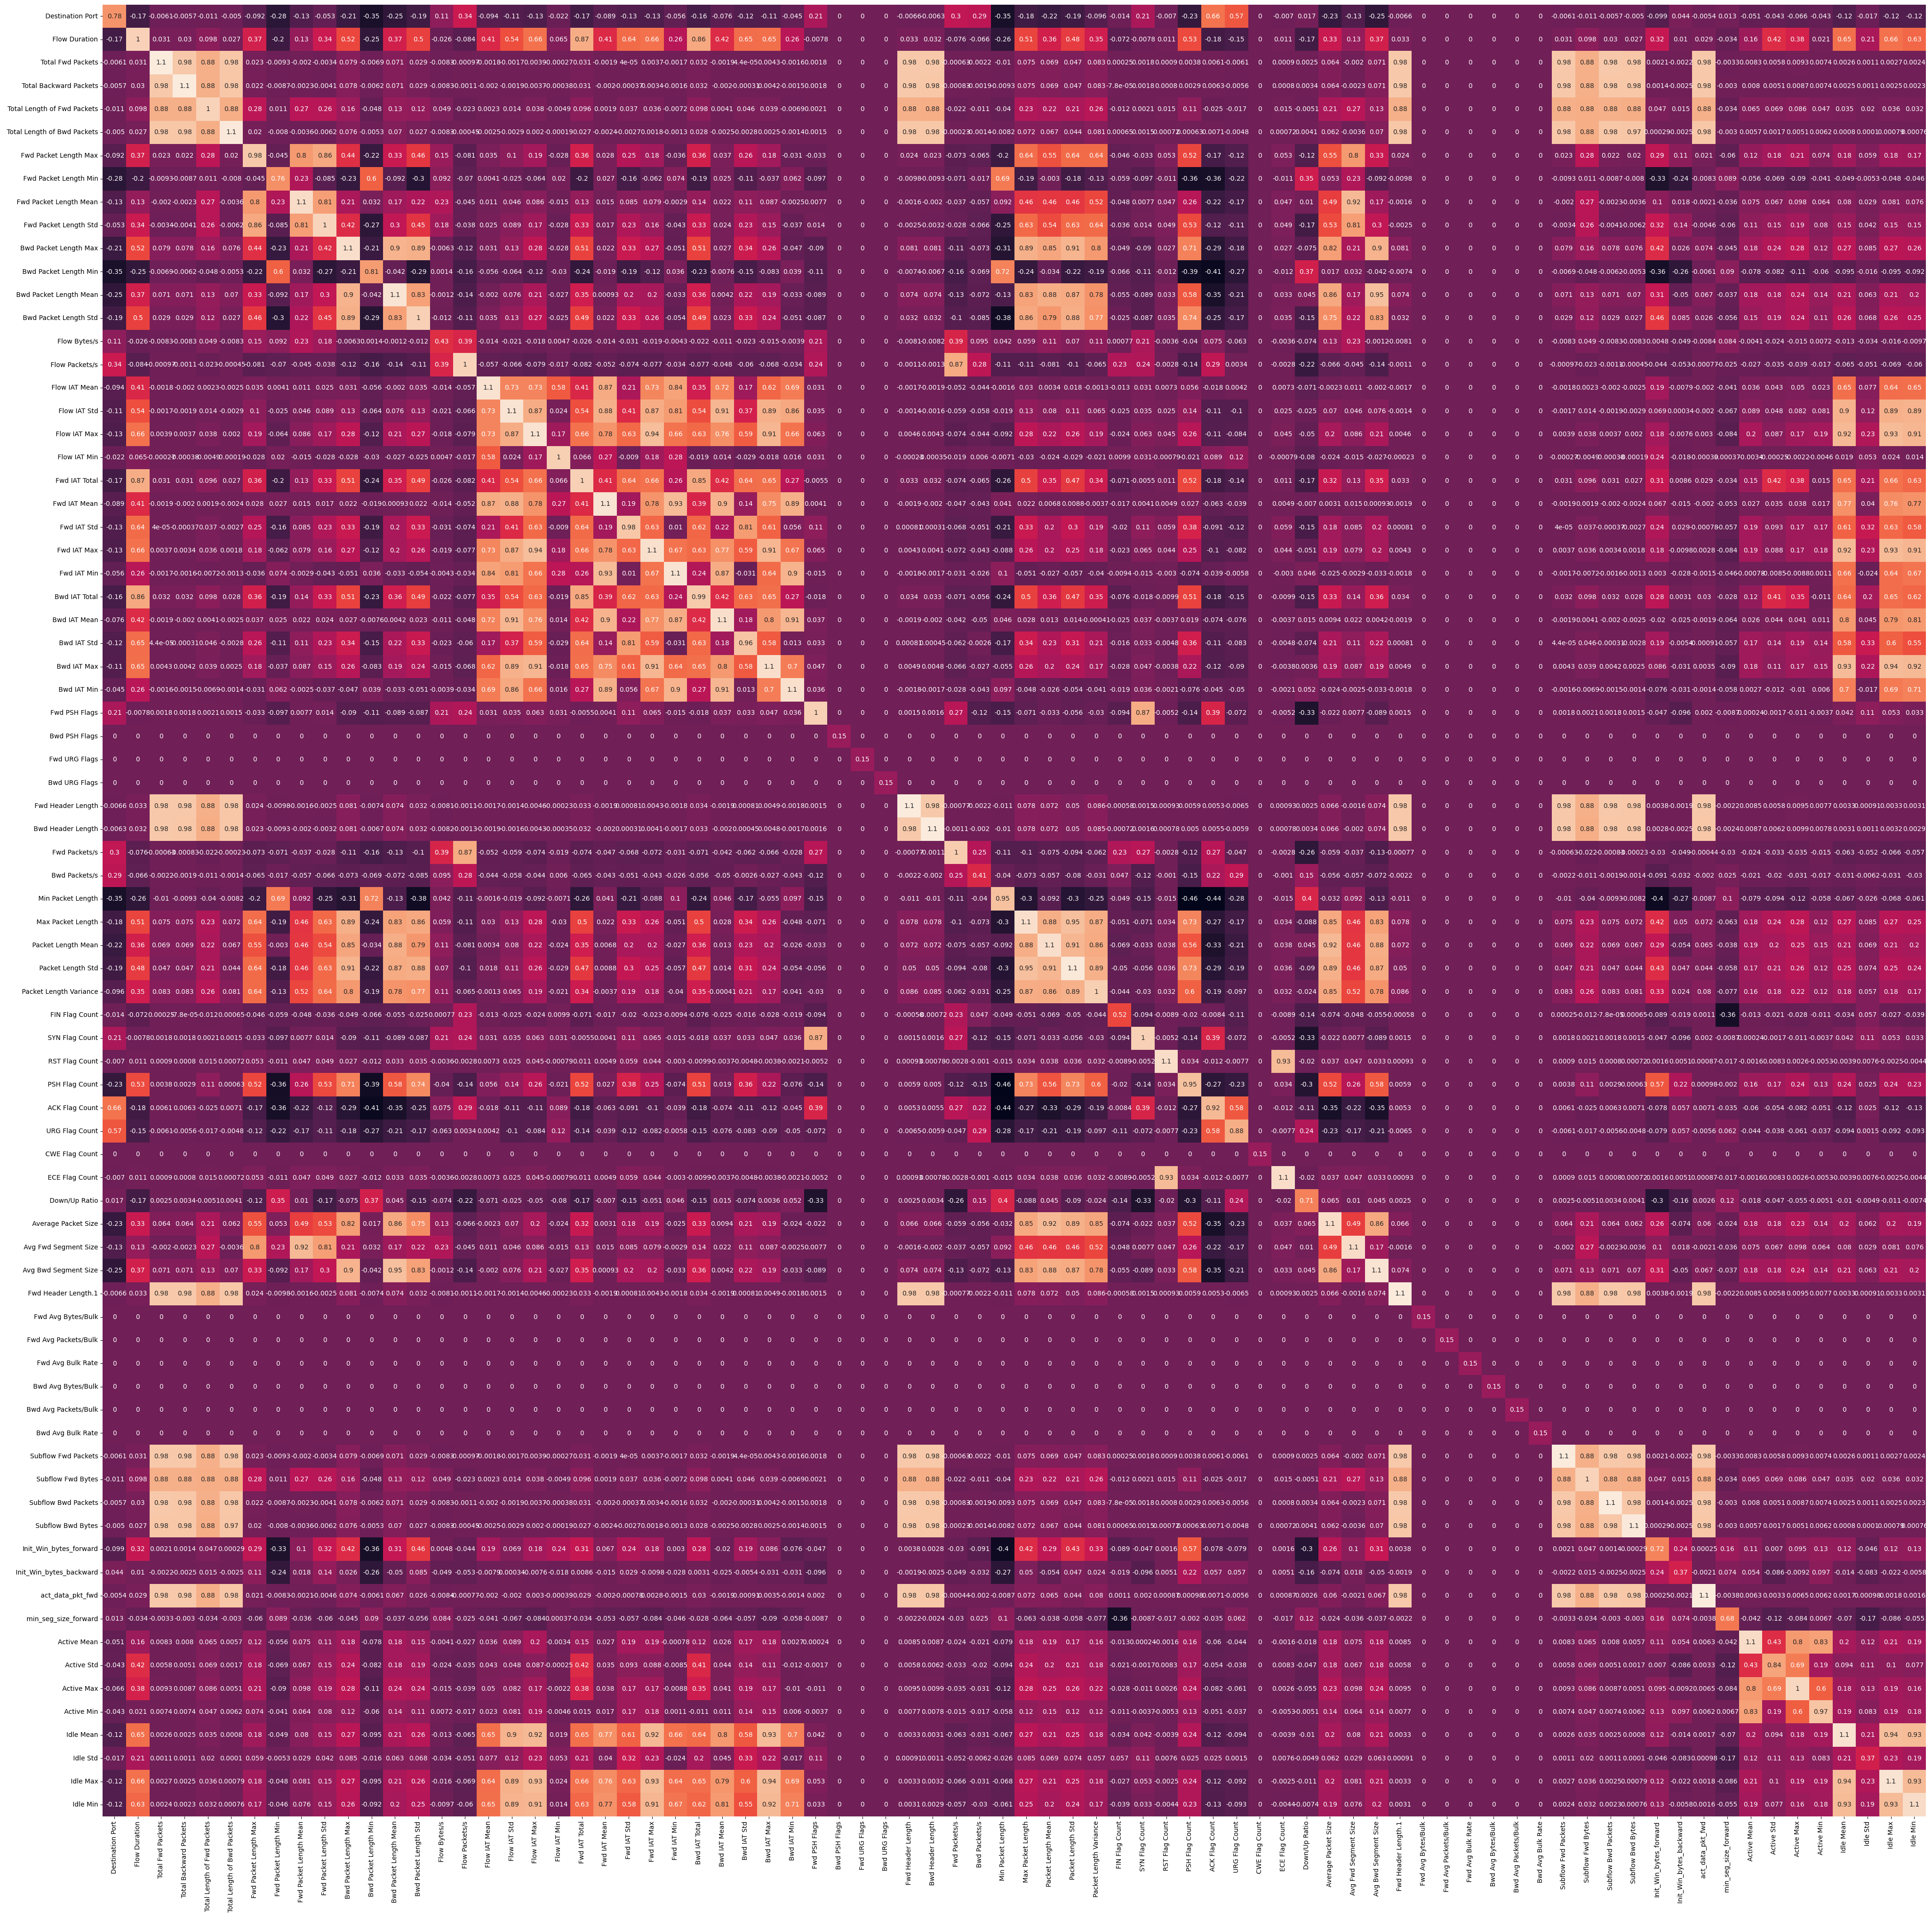

In [23]:
with parallel_backend('threading',n_jobs=-1):
    pc=PCA(n_components=14,random_state=170).fit(dx.drop(columns=dx.columns[temp],axis=1))
    plt.figure(figsize=(50,50))
    _=sns.heatmap(pc.get_covariance(),xticklabels=dx.columns.delete(temp),yticklabels=dx.columns.delete(temp),annot=True,cbar=False)

In [24]:
pc.explained_variance_ratio_.sum()

0.8621982071286041

In [25]:
def reshape_tf(input,dim_req):
    input=np.array(input)
    x=[]
    t=len(input.shape)
    for i in range(t-1):
        x.append(input.shape[i])
    for i in range(dim_req-t):
        x.append(1)
    x.append(input.shape[-1])
    return input.reshape(x)
def reshape_y7(y):    
    return tf.one_hot(y,len(dx[' Label'].unique()))

In [26]:
len(dx[' Label'].unique())

4

In [27]:
cols=dx.columns

model data gen

In [28]:
xtr,xte,ytr,yte=train_test_split(dx.drop(columns=[' Label'],axis=1),dx[' Label'],random_state=170,shuffle=True,stratify=dx[' Label'])
xtr,valx,ytr,valy=train_test_split(xtr,ytr,test_size=0.1,random_state=170,stratify=ytr)
xtr.shape,xte.shape,ytr.shape,yte.shape

((114905, 78), (42558, 78), (114905,), (42558,))

for lstm models only

In [29]:
mxtr=reshape_tf(xtr,3)
mxte=reshape_tf(xte,3)
mytr=reshape_y7(ytr)
myte=reshape_y7(yte)
mvalx=reshape_tf(valx,3)
mvaly=reshape_y7(valy)

In [30]:
mxtr.shape

(114905, 1, 78)

In [31]:
tf_batch_size=1024

lstm

add hardmax layer after training tf models to get a single int instead of one hot encoded rep and to feed to stacked classifier after fit

In [32]:
lstmmodel=Sequential()
lstmmodel.add(tf.keras.layers.Input(shape=mxtr.shape[1:],batch_size=tf_batch_size))
lstmmodel.add(LSTM(units=mxtr.shape[1],return_sequences=True))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/2),return_sequences=True))
lstmmodel.add(Dropout(0.2,seed=170))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/2),return_sequences=True))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/4),return_sequences=False))
lstmmodel.add(Dense(units=len(dx[' Label'].unique())))
lstmmodel.add(Softmax())
expdecay=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.002,
    decay_steps=int(mxtr.shape[0]/100),
    decay_rate=0.999,
    staircase=False,
)
early=tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0,
    start_from_epoch=0,
    restore_best_weights=True,
)
lstmmodel.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[
        tf.metrics.CategoricalAccuracy(),
        tf.metrics.Precision(),
        tf.metrics.Recall(),
    ],
)

In [33]:
mxtr.shape,mxte.shape

((114905, 1, 78), (42558, 1, 78))

In [34]:
lstmhistory=lstmmodel.fit(
    mxtr,
    mytr,
    batch_size=tf_batch_size,
    use_multiprocessing=True,
    workers=cores,
    epochs=200,
    callbacks=[early],
    validation_data=[mvalx,mvaly],
    validation_batch_size=tf_batch_size,
    shuffle=True,
    verbose=1,
)

Epoch 1/200


113/113 [==============================] - 19s 50ms/step - loss: 0.5122 - categorical_accuracy: 0.9794 - precision: 0.9879 - recall: 0.6298 - val_loss: 0.0559 - val_categorical_accuracy: 0.9872 - val_precision: 0.9872 - val_recall: 0.9873
Epoch 2/200
113/113 [==============================] - 2s 20ms/step - loss: 0.0455 - categorical_accuracy: 0.9872 - precision: 0.9872 - recall: 0.9873 - val_loss: 0.0428 - val_categorical_accuracy: 0.9872 - val_precision: 0.9871 - val_recall: 0.9868
Epoch 3/200
113/113 [==============================] - 2s 20ms/step - loss: 0.0386 - categorical_accuracy: 0.9872 - precision: 0.9932 - recall: 0.9846 - val_loss: 0.0400 - val_categorical_accuracy: 0.9872 - val_precision: 0.9973 - val_recall: 0.9827
Epoch 4/200
113/113 [==============================] - 2s 20ms/step - loss: 0.0365 - categorical_accuracy: 0.9872 - precision: 0.9973 - recall: 0.9831 - val_loss: 0.0386 - val_categorical_accuracy: 0.9872 - val_precision: 0.9973 - val_recall: 0.9825
Epoch 5/200

In [35]:
res=[]
res.append([
    lstmmodel.evaluate(
        mxtr,
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    lstmmodel.evaluate(
        mxte,
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

42/42 [==============================] - 0s 9ms/step - loss: 0.0179 - categorical_accuracy: 0.9934 - precision: 0.9942 - recall: 0.9929


tf nn

In [36]:
NNmodel=Sequential()
NNmodel.add(tf.keras.layers.Input(shape=dx.shape[1]-1,batch_size=1024))
NNmodel.add(Dense(units=dx.shape[1]))
NNmodel.add(Dense(units=dx.shape[1]*2))
NNmodel.add(Dropout(0.1,seed=170))
NNmodel.add(Dense(units=dx.shape[1]*2))
NNmodel.add(Dense(units=len(dx[' Label'].unique())))
NNmodel.add(Softmax())
NNmodel.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[tf.metrics.CategoricalAccuracy(),tf.metrics.Precision(),tf.metrics.Recall()]
)

In [37]:
NNhistory=NNmodel.fit(
    xtr,
    mytr,
    use_multiprocessing=True,
    workers=cores,
    callbacks=[early],
    validation_data=[valx,mvaly],
    validation_batch_size=tf_batch_size,
    batch_size=tf_batch_size,
    epochs=200,
    shuffle=True,
    verbose=1,
)

Epoch 1/200
113/113 [==============================] - 4s 16ms/step - loss: 0.1910 - categorical_accuracy: 0.9494 - precision_1: 0.9848 - recall_1: 0.8935 - val_loss: 0.0321 - val_categorical_accuracy: 0.9882 - val_precision_1: 0.9889 - val_recall_1: 0.9883
Epoch 2/200
113/113 [==============================] - 1s 11ms/step - loss: 0.0377 - categorical_accuracy: 0.9879 - precision_1: 0.9920 - recall_1: 0.9852 - val_loss: 0.0326 - val_categorical_accuracy: 0.9883 - val_precision_1: 0.9893 - val_recall_1: 0.9882
Epoch 3/200
113/113 [==============================] - 1s 12ms/step - loss: 0.0334 - categorical_accuracy: 0.9886 - precision_1: 0.9927 - recall_1: 0.9854 - val_loss: 0.0291 - val_categorical_accuracy: 0.9857 - val_precision_1: 0.9971 - val_recall_1: 0.9821
Epoch 4/200
113/113 [==============================] - 1s 12ms/step - loss: 0.0282 - categorical_accuracy: 0.9888 - precision_1: 0.9930 - recall_1: 0.9861 - val_loss: 0.0276 - val_categorical_accuracy: 0.9895 - val_precision_1

In [38]:
res.append([
    NNmodel.evaluate(
        xtr,
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    NNmodel.evaluate(
        xte,
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

42/42 [==============================] - 0s 6ms/step - loss: 0.0237 - categorical_accuracy: 0.9877 - precision_1: 0.9947 - recall_1: 0.9863


argmax layer

In [39]:
class argmaxLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(argmaxLayer, self).__init__(**kwargs)
    def call(self, x):
        return tf.argmax(x, axis=-1)
argmax_tf = argmaxLayer()

In [40]:
NNmodel.layers,lstmmodel.layers

([<keras.src.layers.core.dense.Dense at 0x27446dd89a0>,
  <keras.src.layers.activation.softmax.Softmax at 0x27446d72b00>])

In [41]:
NNmodel.add(argmax_tf)
lstmmodel.add(argmax_tf)
NNmodel.layers,lstmmodel.layers

([<keras.src.layers.core.dense.Dense at 0x27446dd89a0>,
  <__main__.argmaxLayer at 0x27478d968c0>])

In [42]:
NNmodel.predict(xte[:2]),lstmmodel.predict(mxte[:2])

1/1 [==============================] - 3s 3s/step


(array([1, 1], dtype=int64), array([1, 1], dtype=int64))

In [43]:
def eval_sklearn_perf(model,yac=yte,xac=xte):
    ypr=model.predict(xac)
    return accuracy_score(yac,ypr)

sklearn models(svm,rf,km,knn,dt)

In [44]:
with parallel_backend('threading',n_jobs=-1):
    svm=SVC(random_state=170,kernel='rbf').fit(xtr,ytr)
    rf=RandomForestClassifier(max_depth=5,random_state=170,n_estimators=dx[' Label'].unique().size,n_jobs=-1).fit(xtr,ytr)
    knn=KNeighborsClassifier(n_neighbors=1,n_jobs=-1).fit(xtr,ytr)
    dt=DecisionTreeClassifier(random_state=170,max_depth=10).fit(xtr,ytr)

In [45]:
l=[svm,rf,knn,dt]
with parallel_backend('threading',n_jobs=-1):
    for i in l:
        res.append([
            eval_sklearn_perf(i,yac=ytr,xac=xtr),
            eval_sklearn_perf(i),
        ])

xgboost

In [46]:
xgtr=xgb.DMatrix(xtr, label=(ytr-1))
xgte=xgb.DMatrix(xte, label=(yte-1))#-1 due to being 0 indexed
xgbost_model = xgb.train(
    params={
        'objective': 'multi:softmax',
        'num_class': dx[dx.columns[-1]].unique().size,
        'max_depth': 5,
        'eta': 0.01,
        'eval_metric': 'mlogloss'  # Evaluation metric
    },
    dtrain=xgtr,
    num_boost_round=100
)

In [47]:
res.append([
    eval_sklearn_perf(xgbost_model,yac=ytr-1,xac=xgtr),
    eval_sklearn_perf(xgbost_model,yac=yte-1,xac=xgte)
])

In [48]:
modList=[]
modList.append(lstmmodel)
modList.append(NNmodel)
modList.append(xgbost_model)
modList.append(knn)
modList.append(svm)
modList.append(rf)
modList.append(dt)

In [49]:
meta=Sequential()
meta.add(tf.keras.layers.Input(shape=[1,len(modList)],batch_size=tf_batch_size))
meta.add(LSTM(units=10))
meta.add(Dense(units=dx[' Label'].unique().size))
meta.add(Softmax())
meta.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[
        tf.metrics.CategoricalAccuracy(),
        tf.metrics.Precision(),
        tf.metrics.Recall(),
    ]
)

In [50]:
def gen_op(data):
    mdata=reshape_tf(data,3)
    oplist=[]
    for i in range(len(modList)):
        print(f'running model{i},{modList[i]}')
        if i<1:
            oplist.append(modList[i].predict(mdata,batch_size=tf_batch_size,workers=cores,use_multiprocessing=True))#lstm
        elif i==1:
            oplist.append(modList[i].predict(data,batch_size=tf_batch_size,workers=cores,use_multiprocessing=True))#nn
        elif i==2:
            oplist.append(modList[i].predict(xgb.DMatrix(data))+1)#xgboost is 0 indexed
        else:
            with parallel_backend('threading',n_jobs=-1):
                oplist.append(modList[i].predict(data))#sklearn
        print(f'finsihed generating outputs')
    return np.array(oplist)

# stacked model

input dim:samples,1,no_of_models

input data generated from models(?generate and store vs generate at runtime)

validation data generated from models(?generate and store vs generate at runtime)

super sampling to adjust model to select results when inputs are conflicting(all models need to be established first) due to lack of such data vs data where inputs agree

hardmax to be used after training(done)

In [51]:
te_outputs=[]
te_outputs.append(
    gen_op(xte)
)

running model0,<keras.src.engine.sequential.Sequential object at 0x0000027446B0EE30>
42/42 [==============================] - 0s 8ms/step
finsihed generating outputs
running model1,<keras.src.engine.sequential.Sequential object at 0x0000027474A12440>
42/42 [==============================] - 0s 5ms/step
finsihed generating outputs
running model2,<xgboost.core.Booster object at 0x000002747F654880>
finsihed generating outputs
running model3,KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
finsihed generating outputs
running model4,SVC(random_state=170)
finsihed generating outputs
running model5,RandomForestClassifier(max_depth=5, n_estimators=4, n_jobs=-1, random_state=170)
finsihed generating outputs
running model6,DecisionTreeClassifier(max_depth=10, random_state=170)
finsihed generating outputs


In [52]:
tr_outputs=[]
tr_outputs.append(
    gen_op(xtr)
    )

running model0,<keras.src.engine.sequential.Sequential object at 0x0000027446B0EE30>
113/113 [==============================] - 1s 9ms/step
finsihed generating outputs
running model1,<keras.src.engine.sequential.Sequential object at 0x0000027474A12440>
113/113 [==============================] - 1s 6ms/step
finsihed generating outputs
running model2,<xgboost.core.Booster object at 0x000002747F654880>
finsihed generating outputs
running model3,KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
finsihed generating outputs
running model4,SVC(random_state=170)
finsihed generating outputs
running model5,RandomForestClassifier(max_depth=5, n_estimators=4, n_jobs=-1, random_state=170)
finsihed generating outputs
running model6,DecisionTreeClassifier(max_depth=10, random_state=170)
finsihed generating outputs


In [53]:
meta_tr=pd.DataFrame(tr_outputs[0]).T
meta_te=pd.DataFrame(te_outputs[0]).T
meta_tr

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
114900,1.0,1.0,1.0,1.0,1.0,1.0,1.0
114901,1.0,1.0,1.0,1.0,1.0,1.0,1.0
114902,1.0,1.0,1.0,1.0,1.0,1.0,1.0
114903,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [55]:
meta_callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=15,restore_best_weights=True)
metahis=meta.fit(
    np.array(np.array(meta_tr).reshape(xtr.shape[0],1,len(modList))),
    mytr,
    batch_size=tf_batch_size,
    use_multiprocessing=True,
    workers=cores,
    epochs=200,
    callbacks=[meta_callback],
    verbose=1,
)

Epoch 1/200
113/113 [==============================] - 1s 6ms/step - loss: 0.5990 - categorical_accuracy: 0.9873 - precision_2: 0.9854 - recall_2: 0.6181
Epoch 2/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1147 - categorical_accuracy: 0.9872 - precision_2: 0.9872 - recall_2: 0.9873
Epoch 3/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0945 - categorical_accuracy: 0.9872 - precision_2: 0.9872 - recall_2: 0.9873
Epoch 4/200
113/113 [==============================] - 1s 7ms/step - loss: 0.0897 - categorical_accuracy: 0.9872 - precision_2: 0.9872 - recall_2: 0.9873
Epoch 5/200
113/113 [==============================] - 1s 7ms/step - loss: 0.0868 - categorical_accuracy: 0.9872 - precision_2: 0.9872 - recall_2: 0.9873
Epoch 6/200
113/113 [==============================] - 1s 7ms/step - loss: 0.0846 - categorical_accuracy: 0.9872 - precision_2: 0.9872 - recall_2: 0.9873
Epoch 7/200
113/113 [==============================] - 1s 7ms/step - loss: 0

In [56]:
meta.layers

In [57]:
np.array(meta_te).reshape(meta_te.shape[0],1,len(modList)).shape

(42558, 1, 7)

In [58]:
res.append([
    meta.evaluate(
        np.array(meta_tr).reshape(meta_tr.shape[0],1,len(modList)),
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    meta.evaluate(
        np.array(meta_te).reshape(meta_te.shape[0],1,len(modList)),
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

42/42 [==============================] - 0s 4ms/step - loss: 0.0344 - categorical_accuracy: 0.9950 - precision_2: 0.9950 - recall_2: 0.9951


In [59]:
meta.add(argmax_tf)

In [60]:
meta.predict(np.array(meta_te).reshape(meta_te.shape[0],1,len(modList))[:10])

1/1 [==============================] - 1s 724ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# voting classifier

In [61]:
def votingClassifier(data,axis=0,):
    return scipy.stats.mode(data,axis=axis).mode

In [62]:
res.append([
    accuracy_score(ytr,votingClassifier(meta_tr,1).reshape(meta_tr.shape[0])),
    accuracy_score(yte,votingClassifier(meta_te,1).reshape(meta_te.shape[0]))
])

C:\Users\Dell\AppData\Local\Temp\ipykernel_16904\1480873025.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(data,axis=axis).mode
C:\Users\Dell\AppData\Local\Temp\ipykernel_16904\1480873025.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warnin

# results

In [63]:
pd.DataFrame(
    res,
    columns=['train','test'],
    index=['lstm','nueral network','support vector machine','random forest','1-nearest-neighbour','decision tree','xgboost','meta lstm','Voting'],
    )

,train,test
lstm,0.993334,0.993397
nueral network,0.987581,0.987711
support vector machine,0.990975,0.990836
random forest,0.994926,0.994643
1-nearest-neighbour,1.000000,0.995042
decision tree,0.996937,0.995536
xgboost,0.995387,0.995207
meta lstm,0.999878,0.994995
Voting,0.995448,0.995207


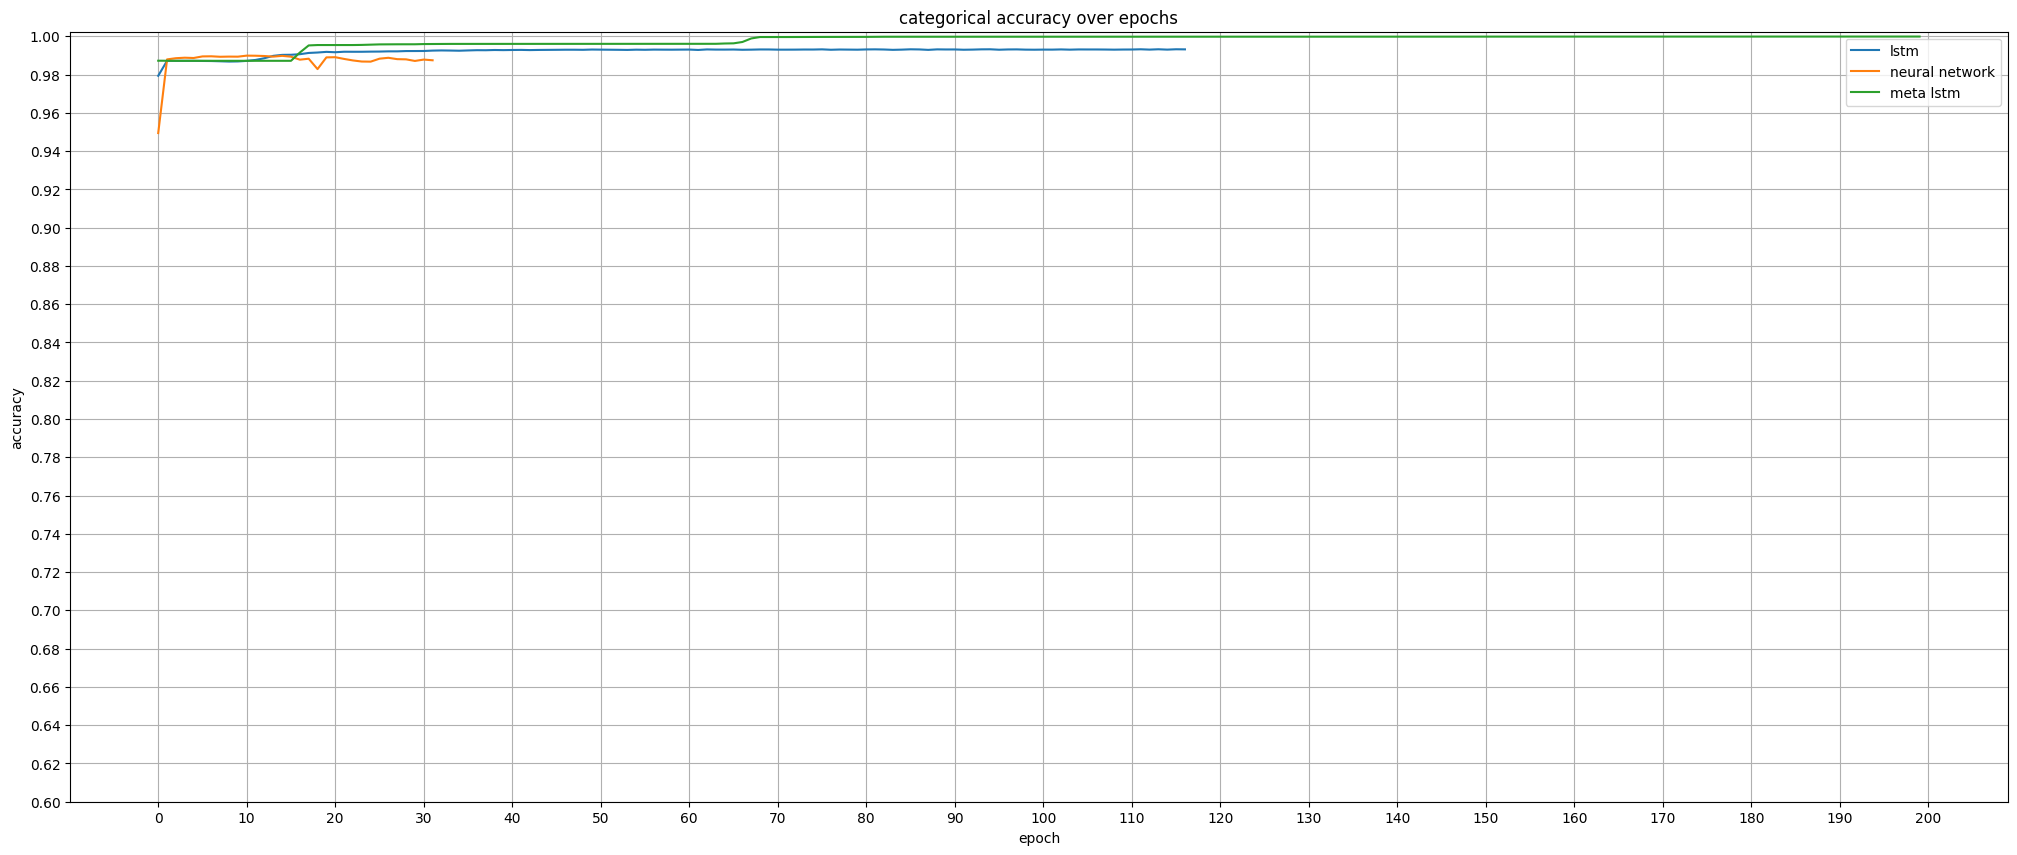

In [65]:
plt.figure(figsize=(25,10))
plt.title('categorical accuracy over epochs')
plt.plot(lstmhistory.history['categorical_accuracy'], label='lstm')
plt.plot(NNhistory.history['categorical_accuracy'], label='neural network')
plt.plot(metahis.history['categorical_accuracy'], label='meta lstm')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.yticks(ticks=np.arange(0.6,1.01,0.02))
plt.xticks(ticks=np.arange(0,201,10))
plt.legend()
plt.grid(True)

In [67]:
end=datetime.now()
f'time taken for notebook execution: {(end-start).seconds}s'

'time taken for notebook execution: 974s'